In [1]:
!pip install -Uqq fastbook


import fastbook
from fastbook import *
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
! [ -e /content ] && pip install kaggle waterfallcharts treeinterpreter dtreeviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.1 MB/s eta 0:00:00
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3389 sha256=4cdd8a4079db5767d0406d002a24f003502920409fb03f7addae483ea67bb0fb
  Stored in directory: /root/.cache/pip/wheels/bd/34/6c/58fce34a3b8ec5607aff650db14ceb41db8223ac217423371b
Successfully built waterfallcharts


In [3]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [4]:

from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [5]:
from fastai.tabular.all import *

In [6]:
creds = '{"username":"fakhariqbal","key":"1ea48243cb414a6b174a11e4f33d4bcf"}'

In [7]:
#cred_path = Path('~/.kaggle/kaggle.json').expanduser()
#if not cred_path.exists():
#    cred_path.parent.mkdir(exist_ok=True)
#    cred_path.write_text(creds)
#    cred_path.chmod(0o600)

In [8]:

#hide
#Path.BASE_PATH = path

In [9]:
path = Path('bluebook')

In [10]:
import zipfile

def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Example usage:
zip_file_path = path / 'bluebook-for-bulldozers.zip'
extract_to_path = path / 'extracted_folder'
extract_zip(path/'bluebook-for-bulldozers.zip', path)

In [11]:
path.ls(file_type='text')

(#7) [Path('bluebook/ValidSolution.csv'),Path('bluebook/Valid.csv'),Path('bluebook/Test.csv'),Path('bluebook/median_benchmark.csv'),Path('bluebook/TrainAndValid.csv'),Path('bluebook/Machine_Appendix.csv'),Path('bluebook/random_forest_benchmark_test.csv')]

In [12]:
df = pd.read_csv(path/'TrainAndValid.csv',low_memory=False)

df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [13]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [14]:
sizes = 'Large','Large / Medium', 'Medium','Small','Mini','Compact'

df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes,ordered=True,inplace=True)

<ipython-input-14-71a911765700>:4: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.


In [15]:
dep_var = 'SalePrice'
df[dep_var] = np.log(df[dep_var])

In [16]:
df = add_datepart(df,'saledate')


In [17]:
df_test = pd.read_csv(path/'Test.csv',low_memory=False)
df_test = add_datepart(df_test,'saledate')

In [18]:
" ".join(o for o in df_test.columns if o.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

In [19]:
cond = (df.saleYear <2011) | (df.saleMonth <10)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx), list(valid_idx))

In [20]:
procs = [Categorify, FillMissing]

cont,cat = cont_cat_split(df,1,dep_var=dep_var)

In [21]:
to = TabularPandas(df,procs,cat,cont,y_names=dep_var,splits=splits)

In [22]:
len(to.train), len(to.valid)

(404710, 7988)

In [23]:
to.show(10)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340
3,High,PC120-6E,PC120,#na#,-6E,#na#,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,#na#,EROPS w AC,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139251,1026470,332,121,3.0,2001,3486.0,2011,5,20,19,3,139,1.305763e+09,10.558414
4,Medium,S175,S175,#na#,#na#,#na#,#na#,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,EROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139253,1057373,17311,121,3.0,2007,722.0,2009,7,30,23,3,204,1.248307e+09,9.305651
5,Low,310G,310,G,#na#,#na#,#na#,Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,Arizona,BL,Backhoe Loaders,Four Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Powershuttle,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139255,1001274,4605,121,3.0,2004,508.0,2008,12,51,18,3,353,1.229558e+09,10.184900
6,High,790ELC,790,E,#na#,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons",Florida,TEX,Track Excavators,#na#,EROPS,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,#na#,#na#,#na#,#na#,#na#,None or Unspecified,#na#,#na#,#na#,Steel

In [24]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


In [25]:
save_pickle(path/'to.pkl',to)

In [26]:
to = load_pickle(path/'to.pkl')

# Decision Trees

In [27]:
xs,y = to.train.xs, to.train.y
valid_xs,valid_y = to.valid.xs, to.valid.y

In [28]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

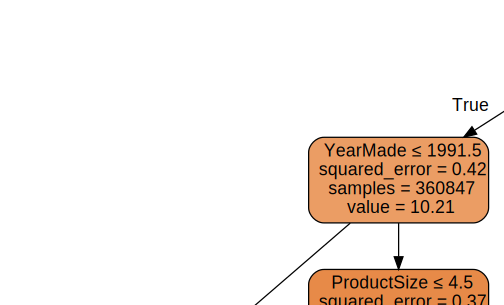

In [29]:
draw_tree(m,xs,size=7,leaves_parallel=True,precision=2)

In [30]:
import dtreeviz
from dtreeviz.trees import *

In [31]:
!pip install --upgrade dtreeviz

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


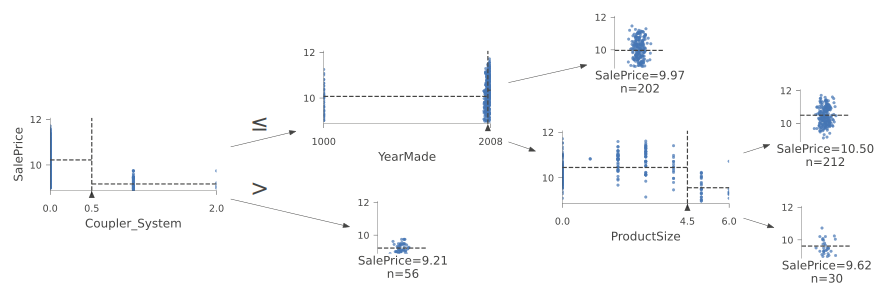

In [32]:


import dtreeviz
samp_idx = np.random.permutation(len(y))[:500]
viz_model=dtreeviz.model(m,
X_train=xs.iloc[samp_idx],
y_train=y.iloc[samp_idx],
feature_names=xs.columns,
target_name=dep_var)

viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
orientation='LR')


In [33]:
xs.loc[xs['YearMade']<1900, 'YearMade'] = 1950
valid_xs.loc[valid_xs['YearMade']<1900, 'YearMade'] = 1950

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


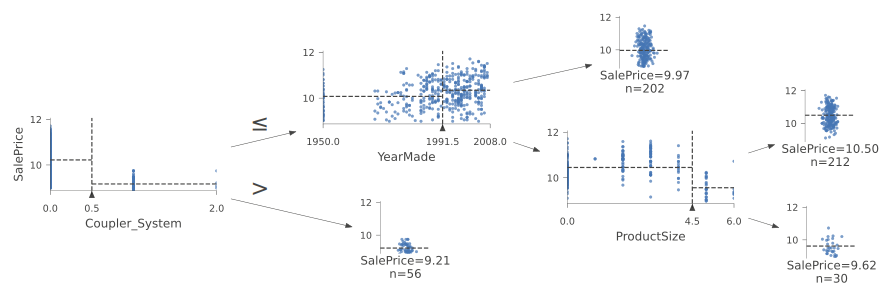

In [34]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs,y)
viz_model=dtreeviz.model(m,
X_train=xs.iloc[samp_idx],
y_train=y.iloc[samp_idx],
feature_names=xs.columns,
target_name=dep_var)

viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
orientation='LR')

In [35]:
m = DecisionTreeRegressor()
m.fit(xs,y)

DecisionTreeRegressor()

In [36]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()),6)

def m_rmse(m,xs,y): return r_mse(m.predict(xs),y)



In [37]:
m_rmse(m,xs,y)

0.0

In [38]:
m_rmse(m,valid_xs,valid_y)

0.334935

In [39]:
m.get_n_leaves(), len(xs)

(324560, 404710)

In [40]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)


DecisionTreeRegressor(min_samples_leaf=25)

In [41]:
m_rmse(m,xs,y), m_rmse(m,valid_xs,valid_y)

(0.248593, 0.323339)

In [42]:
m.get_n_leaves()

12397

#Random Forest

In [43]:
def rf(xs,y,n_estimators=40,max_samples=200_000,
       max_features=0.5,min_samples_leaf=5,**kwargs):
  return RandomForestRegressor(n_jobs=-1,n_estimators=n_estimators,
                               max_samples=max_samples,max_features=max_features,
                               min_samples_leaf=min_samples_leaf,
                               oob_score=True).fit(xs,y)

In [44]:
m = rf(xs,y)

In [45]:
m_rmse(m,xs,y), m_rmse(m,valid_xs,valid_y)

(0.170966, 0.232699)

In [46]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X 

In [47]:
r_mse(preds.mean(0),valid_y)

0.232699

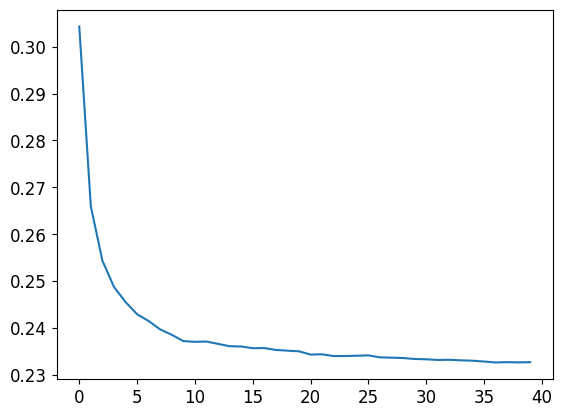

In [48]:
plt.plot([r_mse(preds[:i+1].mean(0),valid_y) for i in range(40)])


In [49]:
r_mse(m.oob_prediction_,y)

0.210776

In [50]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
preds.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X 

(40, 7988)

In [51]:
preds_std = preds.std(0)

In [52]:
preds_std.shape

(7988,)

In [53]:
preds_std[:5]

array([0.26069358, 0.10409366, 0.09904178, 0.27184634, 0.13110276])

In [54]:
def rf_feat_importance(m,df):
  return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp',ascending=False)

In [55]:
fi = rf_feat_importance(m,xs)
fi[:10]

,cols,imp
57,YearMade,0.173023
6,ProductSize,0.117253
30,Coupler_System,0.117053
7,fiProductClassDesc,0.073112
54,ModelID,0.054777
65,saleElapsed,0.048835
3,fiSecondaryDesc,0.046104
31,Grouser_Tracks,0.041196
12,Enclosure,0.040495
32,Hydraulics_Flow,0.032725


In [56]:
def plot_fi(fi):
  return fi.plot('cols','imp','barh',figsize=(12,7),legend=False)

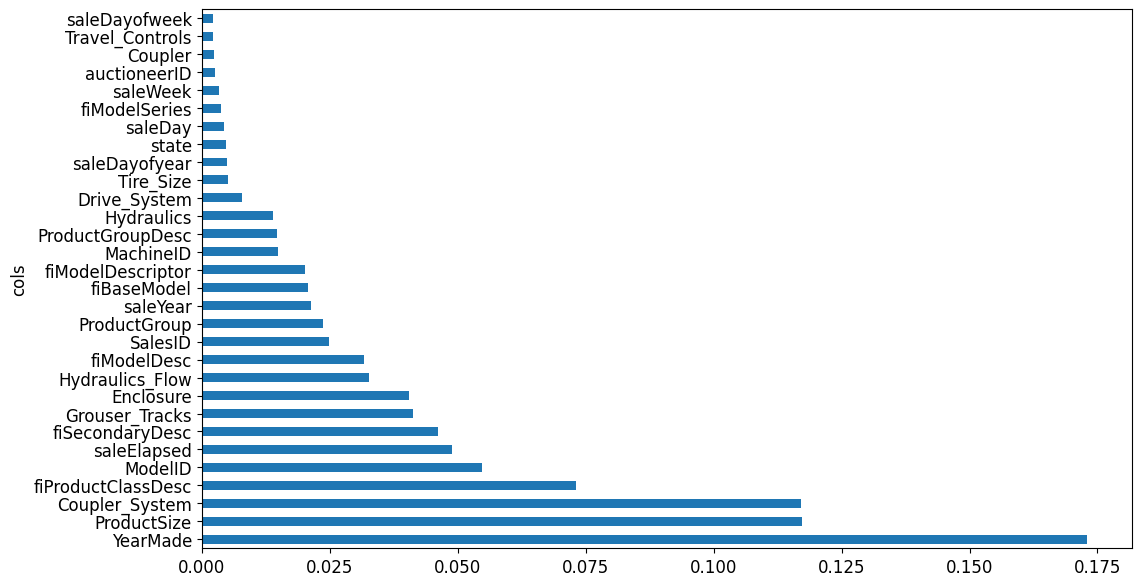

In [57]:
plot_fi(fi[:30]);

In [58]:
to_keep = fi[fi.imp >0.005].cols
len(to_keep)

21

In [59]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [60]:
m = rf(xs_imp,y)

In [61]:
m_rmse(m,xs_imp,y), m_rmse(m,valid_xs_imp,valid_y)

(0.18131, 0.230503)

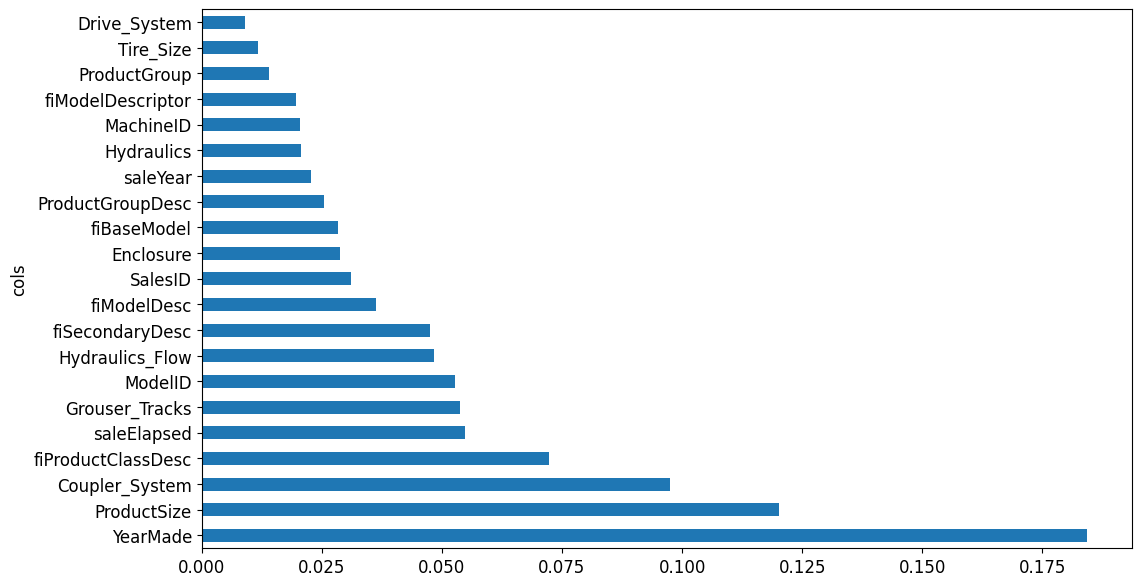

In [62]:
plot_fi(rf_feat_importance(m,xs_imp));

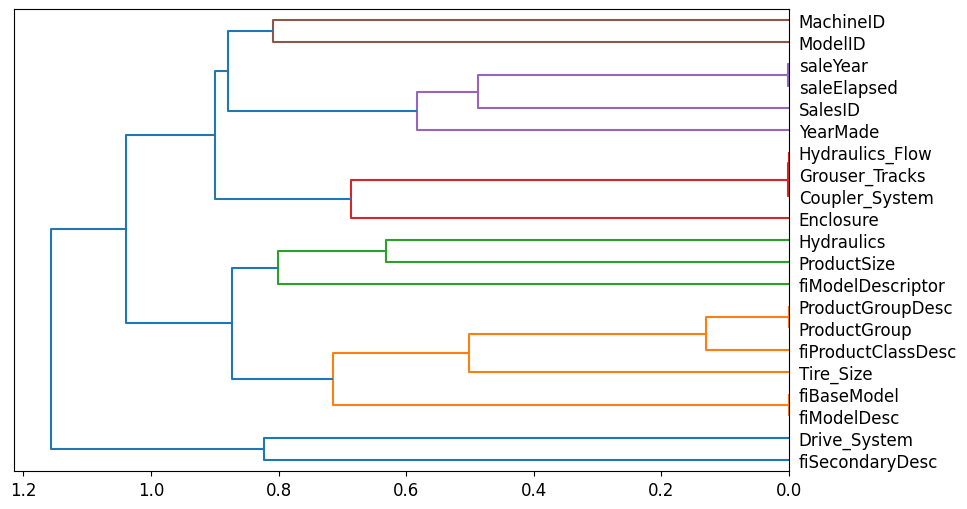

In [63]:
cluster_columns(xs_imp)

In [64]:
def get_oob(df):
  m = RandomForestRegressor(n_estimators=40,min_samples_leaf=15,max_samples=50000,
                            max_features=0.5, n_jobs=-1,oob_score=True)
  m.fit(df,y)

  return m.oob_score_

In [65]:
{c:get_oob(xs_imp.drop(c,axis=1)) for c in ('saleYear','saleElapsed','ProductGroupDesc','ProductGroup',
                                            'fiModelDesc','fiBaseModel','Hydraulics_Flow','Grouser_Tracks','Coupler_System')}

{'saleYear': 0.876901209285474,
 'saleElapsed': 0.8728538793001603,
 'ProductGroupDesc': 0.8767499235558702,
 'ProductGroup': 0.8765513524039406,
 'fiModelDesc': 0.8759928754343748,
 'fiBaseModel': 0.8764443191856653,
 'Hydraulics_Flow': 0.8778843500956613,
 'Grouser_Tracks': 0.8770145382899371,
 'Coupler_System': 0.8771579514598372}

In [66]:
to_drop = ['saleYear','ProductGroupDesc','fiBaseModel','Grouser_Tracks']
get_oob(xs_imp.drop(to_drop,axis=1))

0.8743586923913149

In [67]:
xs_imp

,YearMade,ProductSize,Coupler_System,fiProductClassDesc,...,ProductGroupDesc,Hydraulics,Drive_System,Tire_Size
0,2004,0,0,59,...,6,1,0,17
1,1996,3,0,62,...,6,1,0,12
2,2001,0,1,39,...,3,4,0,0
3,2001,4,0,8,...,4,1,0,0
4,2007,0,1,40,...,3,4,0,0
...,...,...,...,...,...,...,...,...,...
412693,2005,5,0,13,...,4,12,0,0
412694,2005,5,0,17,...,4,4,0,0
412695,2005,5,0,13,...,4,4,0,0
412696,2006,5,0,13,...,4,4,0,0


In [68]:
xs_final = xs_imp.drop(to_drop,axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop,axis=1)


In [69]:
save_pickle(path/'xs_final.pkl',xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)

In [70]:
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

In [71]:
m = rf(xs_final,y)

In [72]:
m_rmse(m,xs_final,y), m_rmse(m,valid_xs_final,valid_y)

(0.183518, 0.233164)

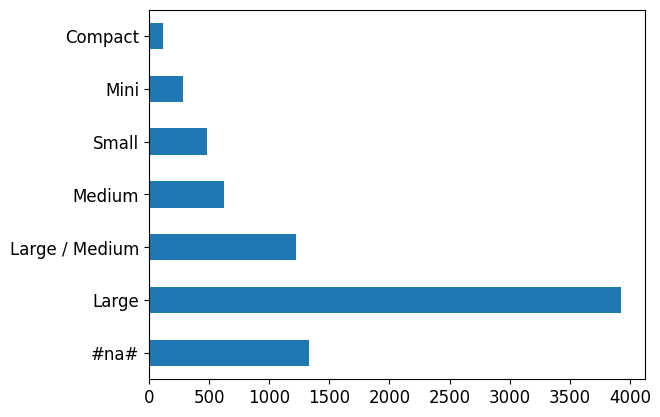

In [73]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)),c);

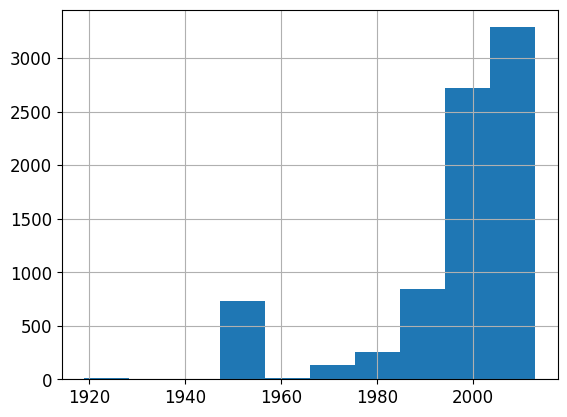

In [74]:
ax = valid_xs_final['YearMade'].hist()

In [75]:
row = valid_xs_final.iloc[:5]

In [76]:
!pip install treeinterpreter

In [77]:
from treeinterpreter import treeinterpreter
predictions,bias,contributions = treeinterpreter.predict(m,row.values)

In [78]:
predictions[0], bias[0], contributions[0].sum()

(array([10.01627917]), 10.10410268058586, -0.0878235071427915)

In [79]:
!pip install waterfallcharts


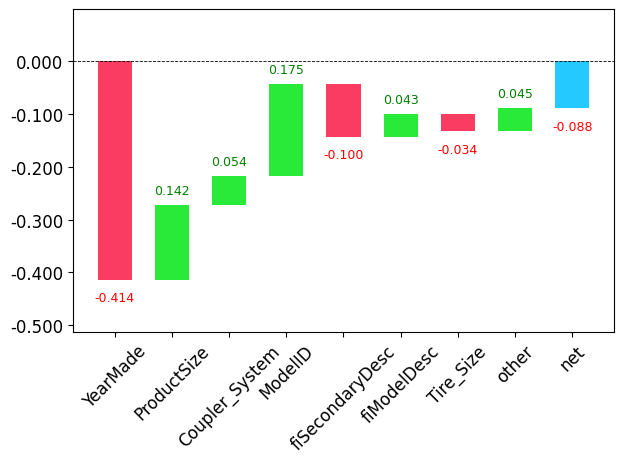

In [80]:
from waterfall_chart import plot as waterfall
waterfall(valid_xs_final.columns, contributions[0],threshold=0.08,rotation_value=45,formatting='{:,.3f}');

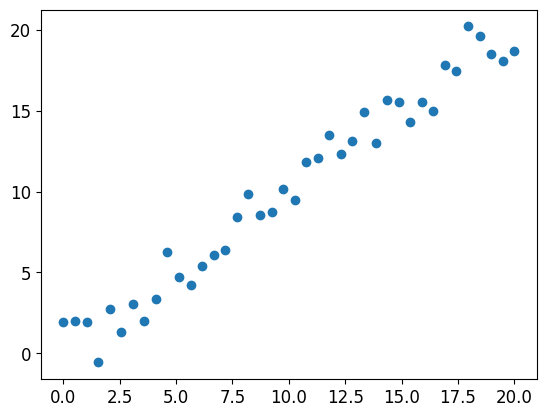

In [81]:
x_lin = torch.linspace(0,20,steps=40)
y_lin = x_lin  + torch.randn_like(x_lin)

plt.scatter(x_lin,y_lin)

In [82]:
xs_lin = x_lin.unsqueeze(1)
xs_lin.shape, x_lin.shape

(torch.Size([40, 1]), torch.Size([40]))

In [83]:
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])


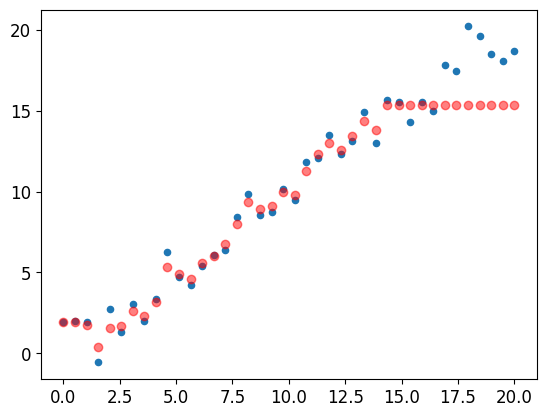

In [84]:
plt.scatter(x_lin,y_lin,20)
plt.scatter(x_lin,m_lin.predict(xs_lin),color='red',alpha=0.5)

#Out of domain data

In [85]:
df_dom = pd.concat([xs_final,valid_xs_final])
is_valid = np.array([0]* len(xs_final) + [1] *len(valid_xs_final))

In [86]:
m = rf(df_dom,is_valid)

In [87]:
rf_feat_importance(m,df_dom)[:6]

,cols,imp
5,saleElapsed,0.885064
10,SalesID,0.099227
13,MachineID,0.011500
0,YearMade,0.000871
4,ModelID,0.000830
3,fiProductClassDesc,0.000445


In [88]:
m = rf(xs_final,y)
print('orig',m_rmse(m,valid_xs_final,valid_y))

for c in ('SalesID','saleElapsed','MachineID'):
  m = rf(xs_final.drop(c,axis=1),y)
  print(c,m_rmse(m,valid_xs_final.drop(c,axis=1),valid_y))

orig 0.232789
SalesID 0.230245
saleElapsed 0.235375
MachineID 0.230538


In [89]:
time_vars = ['SalesID','MachineID']
xs_final_time = xs_final.drop(time_vars,axis=1)
valid_xs_time = valid_xs_final.drop(time_vars,axis=1)




In [90]:
m = rf(xs_final_time,y)
m_rmse(m,valid_xs_time,valid_y)

0.229322

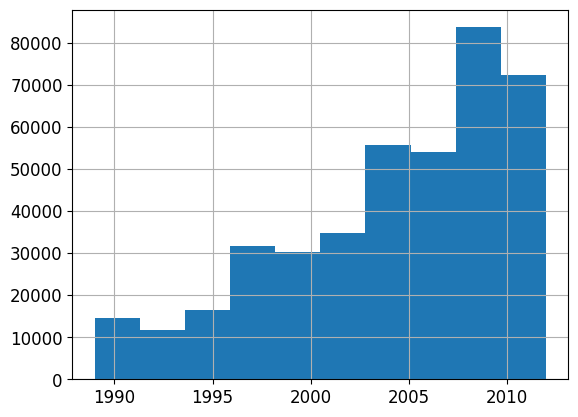

In [91]:
xs['saleYear'].hist();

In [92]:
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]
m = rf(xs_filt,y_filt)
m_rmse(m,xs_filt,y_filt) , m_rmse(m,valid_xs_time,valid_y)

(0.177737, 0.229732)

#With Neural Networks

In [93]:
df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'].cat.set_categories(sizes,ordered=True,inplace=True)
df_nn[dep_var] = np.log(df_nn[dep_var])

df_nn = add_datepart(df_nn, 'saledate')

<ipython-input-93-f1256c79c95f>:3: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.


In [94]:
df_nn_final = df_nn[list(xs_final_time.columns)+ [dep_var]]

In [95]:
cont_nns, cat_nns = cont_cat_split(df_nn_final,max_card=9000, dep_var=dep_var)

In [96]:
cont_nns

['saleElapsed']

In [98]:
cat_nns

['YearMade',
 'ProductSize',
 'Coupler_System',
 'fiProductClassDesc',
 'ModelID',
 'fiSecondaryDesc',
 'Enclosure',
 'Hydraulics_Flow',
 'fiModelDesc',
 'ProductGroup',
 'fiModelDescriptor',
 'Hydraulics',
 'Drive_System',
 'Tire_Size']

In [99]:
df_nn_final[cat_nns].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiProductClassDesc      74
ModelID               5281
fiSecondaryDesc        177
Enclosure                6
Hydraulics_Flow          3
fiModelDesc           5059
ProductGroup             6
fiModelDescriptor      140
Hydraulics              12
Drive_System             4
Tire_Size               17
dtype: int64

In [100]:
xs_filt2 = xs_filt.drop('fiModelDescriptor',axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)

m2 = rf(xs_filt2,y_filt)
m_rmse(m2,xs_filt2,y_filt) , m_rmse(m2, valid_xs_time2, valid_y)

(0.176764, 0.230348)

In [101]:
cat_nns.remove('fiModelDescriptor')

In [102]:
nn_procs = [Categorify, FillMissing, Normalize]



In [103]:
to_nn = TabularPandas(df_nn_final, nn_procs,cat_nns, cont_nns, splits=splits, y_names=dep_var)

In [104]:
dls = to_nn.dataloaders(1024)

In [105]:
y = to_nn.train.y
y.min(), y.max()

(8.465899, 11.863583)

In [106]:
from fastai.tabular.all import *


In [111]:
learn = tabular_learner(dls,y_range=(8,12), layers=[500,250], n_out=1,loss_func=F.mse_loss)

SuggestedLRs(valley=0.0002290867705596611)

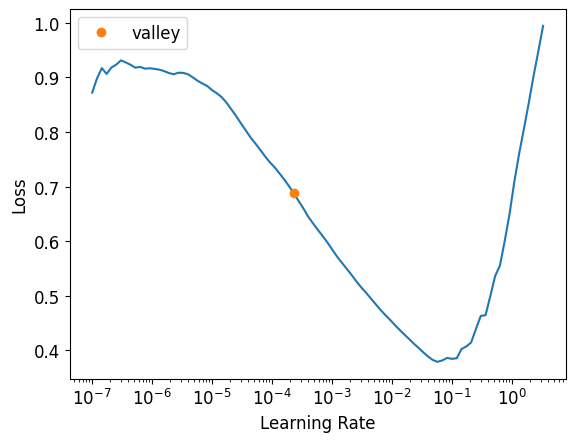

In [112]:
learn.lr_find()

In [113]:
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,time
0,0.063419,0.082404,00:06
1,0.054132,0.057664,00:04
2,0.048663,0.055325,00:05
3,0.043721,0.050475,00:05
4,0.040122,0.050426,00:04


In [114]:
preds, targs = learn.get_preds()
r_mse(preds,targs)

0.224557

In [115]:
learn.save('nn')

Path('models/nn.pth')

# Ensemble of Random forest and Neural Network

In [116]:
rf_preds = m.predict(valid_xs_time)
ens_preds = (to_np(preds.squeeze())+ rf_preds)/2

In [117]:
r_mse(ens_preds,valid_y)

0.22194